# McStatistics

### Author: Tadd Bindas

A series of mathematical concepts to understand how many miles a single burger is worth



In [5]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import mcstatistics as mc

In [2]:
file_path = Path.cwd() / "../data/mcdonalds-nutrition-facts.pdf"
df : pd.DataFrame = mc.read_menu(file_path)

In [7]:
df.head()

,Item Name,Serving Size,Calories,Calories From Fat,Total Fat (g),% Daily Value*,Saturated Fat (g),% Daily Value**,Trans Fat (g),Cholesterol (mg),...,Carbohydrates (g),% Daily Value*,Dietary Fiber (g),% Daily Value*,Sugars (g),Protein (g),Vitamin A,Vitamin C,Calcium,Iron
0,Bacon Clubhouse Burger,9.7 oz,740,370,41,64,16,79,1.5,125,...,51,17,4,14,14,40,8,25,30,25
1,Bacon Clubhouse Grilled Chicken Sandwich,10 oz,610,230,26,39,8,42,0,125,...,50,17,3,14,14,45,8,30,35,15
2,Bacon Clubhouse Buttermilk Crispy Chicken Sand...,10.1 oz,790,360,40,62,11,53,0.5,110,...,67,22,5,18,15,40,8,35,30,25
3,McChicken ®,5.1 oz,370,150,17,26,3.5,16,0,40,...,40,13,2,8,5,14,2,0,10,15
4,Buffalo Ranch McChicken,5.2 oz,370,150,17,26,3.5,17,0,40,...,41,14,2,8,5,14,2,0,15,15


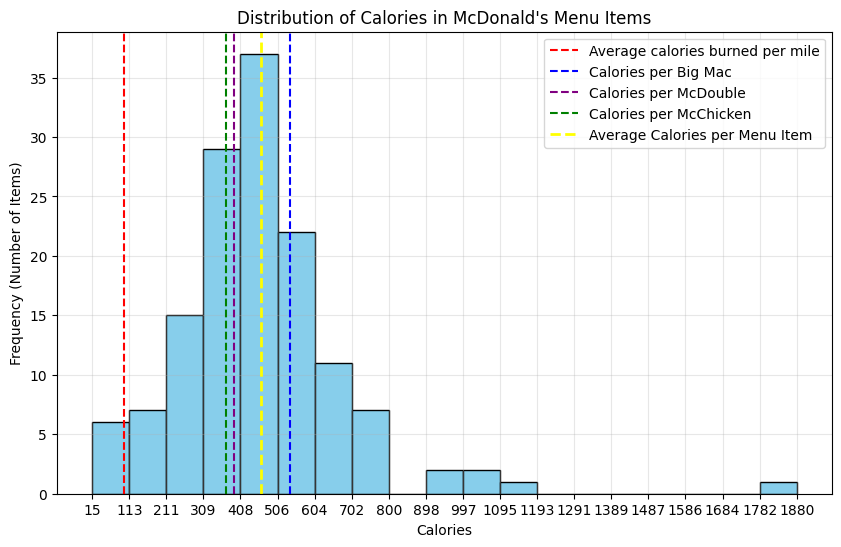

In [21]:
calories_burned_per_mile = 100

plt.figure(figsize=(10, 6))

calories_mcchicken = float(df.iloc[3]["Calories"])
calories_bigmac = float(df.iloc[16]["Calories"])
calories_mcdouble = float(df.iloc[24]["Calories"])

calories = df['Calories'].values.astype(float)
mean_calories = np.mean(calories)

bins = np.linspace(np.min(calories), np.max(calories), 20) 

plt.hist(calories, bins=bins, edgecolor='black', color='skyblue')

plt.title('Distribution of Calories in McDonald\'s Menu Items')
plt.xlabel('Calories')
plt.ylabel('Frequency (Number of Items)')

plt.axvline(x=calories_burned_per_mile, color='red', linestyle='--', label="Average calories burned per mile")
plt.axvline(x=calories_bigmac, color='blue', linestyle='--', label="Calories per Big Mac")
plt.axvline(x=calories_mcdouble, color='purple', linestyle='--', label="Calories per McDouble")
plt.axvline(x=calories_mcchicken, color='green', linestyle='--', label="Calories per McChicken")
plt.axvline(x=mean_calories, color='yellow', linestyle='--', label="Average Calories per Menu Item", linewidth=2)

plt.legend()

plt.grid(True, alpha=0.3)

plt.xticks(bins)

plt.show()